# The sign-flip code: 
##  |0> state as input 
Quantum error correction is crucial for quantum computers, here we discuss about the sign-flip code with demonstrate the simulation results.

In [1]:
# Import libraries for use
from qiskit import *
import numpy as np
from random import random
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
## SETUP
# Protocol uses 4 qubits and 1 classical bit in a register
qr = QuantumRegister(4, name="q")    # Protocol uses 4 qubits
cr = ClassicalRegister(1, name="cr") # and 1 classical bit cr
sign_flip_circuit = QuantumCircuit(qr, cr)

In [3]:
def encoding(qc, q0, q1, q2):
    """Creates encoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target (Use q1 to control q0.)
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target

By default, the initial state in Qiskit is $\left|0\right\rangle$.  
In the circuit we create $\left|q3\right\rangle$= $\sqrt{1-p}\left|0\right\rangle +\sqrt{p}\left|1\right\rangle $ to simulate the probability of the occurrence of error.  After measuring the the state, the state has a probabilty of (1-p) to collapase to $\left|0\right\rangle$ state and probability of p to collapse to $\left|1\right\rangle$ state.   
We applied the occurence of the error to the three input qubits, and the probability of the input $\left|0\right\rangle$ state transmitted correctly is the same, which is (1-p) in this case. 


In [4]:
# initialization instruction to create  
# |ψ⟩ from the state |0⟩:  
p = 1 # p stands for the probability of sign-fliping the state of the qubit
psi = [np.sqrt(1-p), np.sqrt(p)]
init_gate = Initialize(psi) # initialize the superposition state
init_gate.label = "init"

In [5]:
def error_simulation(qc, q0, q1, q2, q3):
    """Creates error simulation using qubits q0 & q1 & q2 & q3"""
    qc.append(init_gate, [3]) # create the superposition state for |q3>
    measure(qc, 3, 0) # measure the state on |q3>
    qc.z(q0).c_if(cr, 1) # apply z gate on q0 if |1> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.z(q1).c_if(cr, 1) # apply z gate on q1 if |1> was measured by |q3>
    qc.append(init_gate, [3])
    measure(qc, 3, 0)
    qc.z(q2).c_if(cr, 1) # apply z gate on q2 if |1> was measured by |q3>

In [6]:
def measure(qc, q0, cr):
    """Measures qubit q0 """
    qc.barrier()
    qc.measure(q0,cr)

In [7]:
def decoding(qc, q0, q1, q2):
    """Creates decoding process using qubits q0 & q1 & q2"""
    qc.cx(q0,q1) # CNOT with q1 as control and q0 as target
    qc.cx(q0,q2) # CNOT with q2 as control and q0 as target
    qc.ccx(q2,q1,q0) # Apply a Toffoli gate |011> <-> |111>

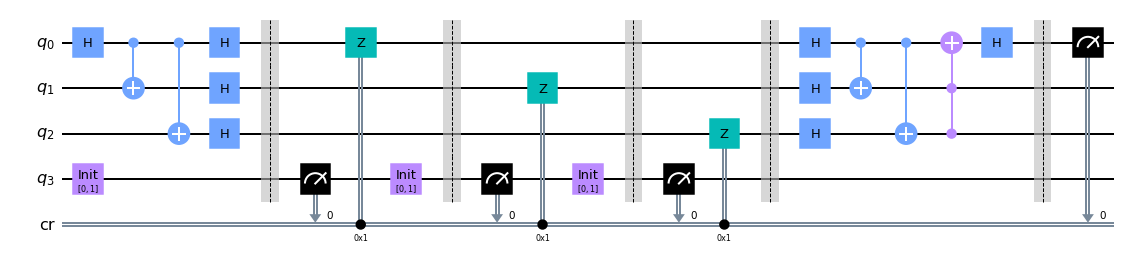

In [8]:
# Let's apply the process above to our circuit:

# step 0. input |0> -> |+>
sign_flip_circuit.h(0)
# step 1. encoding
encoding(sign_flip_circuit, 0, 1, 2)
sign_flip_circuit.h(0)
sign_flip_circuit.h(1)
sign_flip_circuit.h(2)
# step 2. error simulation
error_simulation(sign_flip_circuit, 0, 1, 2, p)
sign_flip_circuit.barrier()

# step 3. decoding
sign_flip_circuit.h(0)
sign_flip_circuit.h(1)
sign_flip_circuit.h(2)
decoding(sign_flip_circuit, 0, 1, 2)

# step 4. measurement
sign_flip_circuit.h(0)
measure(sign_flip_circuit, 0, 0)

# View the circuit:
%matplotlib inline
sign_flip_circuit.draw(output='mpl')

# Measurement result
The result shows that the probability of $\left|+\right\rangle$ state to remain the same state at the output is 1. 
If there weren't any encoder then the probability for the sign-flip depends on the p we set for the error simulation.

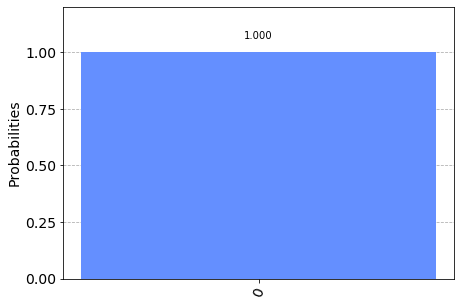

In [9]:
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(sign_flip_circuit, backend, shots=1024).result().get_counts() # No. of measurement shots = 1024
plot_histogram(counts)

# Decoding result analysis
The table below shows the result before and after the decoding process. 

The probability of the decoding result also depends on the probability of the error simulation.

| Before Decoding |  | After decoding |
| :- | -: | :-: |
| 000 | |000 | 
| 001 | |001 | 
| 010 | |010 | 
| 011 | |111 | 
| 100 | |011 | 
| 101 | |110 | 
| 110 | |101 | 
| 111 | |100 | 